# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: Johnny Gomes
        e o Nomeriano

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
covid = pd.read_csv("./data/begin_covid.csv")

In [3]:
#covid.head()
covid.tail()

,regiao,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
99,Brasil,76,43986,23,210147125,614941,30925,34021,1473,254963.0,325957.0
100,Brasil,76,43987,23,210147125,645771,30830,35026,1005,266940.0,343805.0
101,Brasil,76,43988,23,210147125,672846,27075,35930,904,277149.0,359767.0
102,Brasil,76,43989,24,210147125,691758,18912,36455,525,283952.0,371351.0
103,Brasil,76,43990,24,210147125,707412,15654,37134,679,290040.0,380238.0


In [4]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

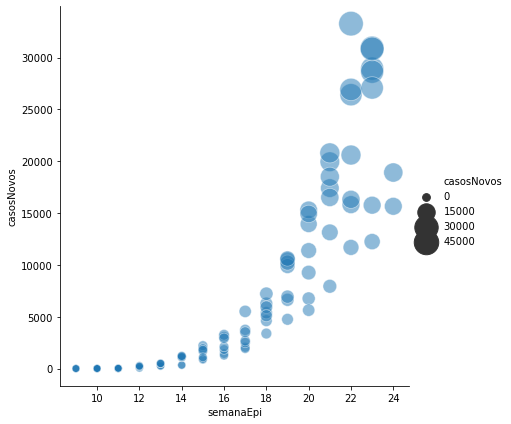

In [5]:
# grafico do crescimento de novos casos ao longos das semanas
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosNovos', palette="muted",
            height=6, data=covid)

### Entendimento dos dados a partir de graficos e outros indicadores 

In [6]:
from bokeh.plotting import figure, output_file, show

In [7]:
# lê info regionais - divididos por estados, inclusive
df = pd.read_csv("./data/covid_regioes.csv")

In [ ]:
df

In [8]:
# separacao visual dos dados em relacao ao atributo 'regiao'
#casos_Norte = df.loc[df2.regiao == 'Norte']

# posteriormente esses slices podem ser feitos em relacao aos estados
casos_TO = df.loc[(df.regiao == 'Norte') & (df.estado == 'TO')]
casos_AM = df.loc[(df.regiao == 'Norte') & (df.estado == 'AM')]

In [22]:
# 1 - pegar total de casos de cada estado dinamicamente:


In [23]:
# 2 - criar grafo com regioes:
G = nx.Graph()
G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])

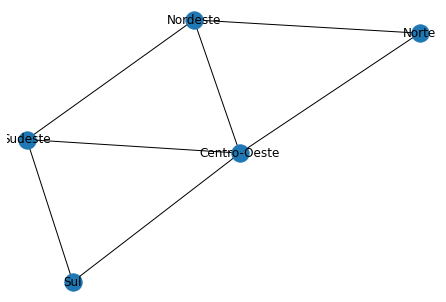

In [24]:
# 2.0.1 - vê a estrutura do grafo:
nx.draw(G, with_labels=True)

In [25]:
# 2.2 - adiciona os vertices (estados) as regioes:
G.add_edges_from(
    [('TO', 'Norte'), ('PA', 'Norte'), ('AM', 'Norte'), ('AC', 'Norte'),
     ('AP', 'Norte'),('RO', 'Norte'), ('RR', 'Norte')])

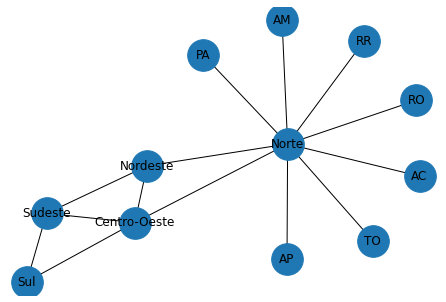

In [28]:
# 2.2.1 - ver a estrutura do grafo:
nx.draw(G, node_size=1000, with_labels=True)

In [ ]:
# 3 - atribuir valores a cada vértice estado:


In [ ]:
# 4 - somar valores dos vértices estado e atribuir a sua regiao específica:


In [ ]:
# 5 - O raio do nó é relativo ao numero de casos (usar interpolador entre o menor e maior numero):


In [ ]:
# 6 - animar o grafo e adicionar hover com informacoes de numero de casos e outras:


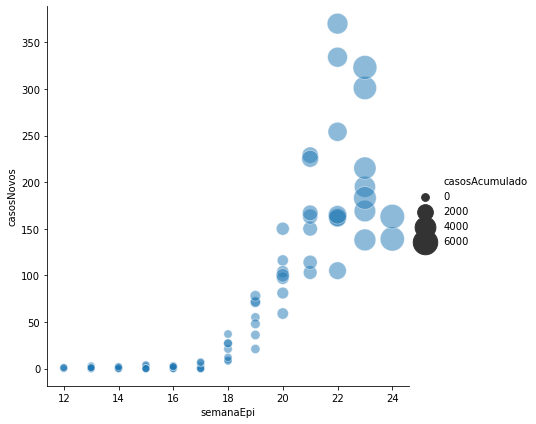

In [18]:
# grafico do crescimento de novos casos ao longos das semanas
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosAcumulado', palette="muted",
            height=6, data=casos_TO)

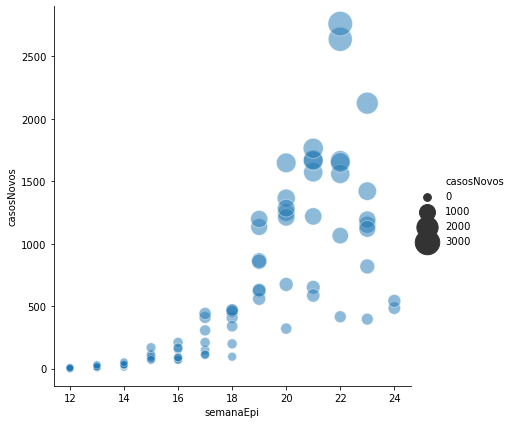

In [19]:
# grafico do crescimento de novos casos ao longos das semanas
sns.relplot(x="semanaEpi", y="casosNovos",
            sizes=(60, 600), alpha=.5, size='casosNovos', palette="muted",
            height=6, data=casos_AM)

In [21]:
# pega total de casos acumulados no Tocantins:
casos_TO.casosAcumulado[-1:]

572    5807
Name: casosAcumulado, dtype: int64

In [14]:
casos_TO.data

491    19/03/20
492    20/03/20
493    21/03/20
494    22/03/20
495    23/03/20
         ...   
568    04/06/20
569    05/06/20
570    06/06/20
571    07/06/20
572    08/06/20
Name: data, Length: 82, dtype: object

### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

### 2. Criação da base de dados de interesse:

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

#### 3.b) Integração dos dados:

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: